In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [7]:
data = pd.read_csv("C:/Users/Nandini/OneDrive/Desktop/Corizo/1729258-1613615-Stock_Price_data_set_(1).csv")


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


<AxesSubplot:>

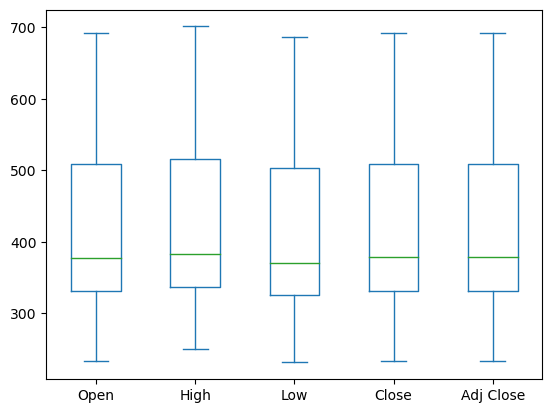

In [11]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [16]:
#setting layout
layout=go.Layout(
    title="stock prices",
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=20,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='price',
        titlefont=dict(
            family='Courier New, monospace',
            size=20,
            color='#7f7f7f'
        )
    )
)
data1=[{'x':data['Date'],'y':data['Close']}]
plot = go.Figure(data=data1,layout=layout)

In [17]:
iplot(plot)

In [27]:
from sklearn.model_selection import train_test_split

#preprossesing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [33]:
#split data
X=np.array(data.index).reshape(-1,1)
Y=data['Close']
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [34]:
scaler=StandardScaler().fit(X_train)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
#creating a linear model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [37]:
#plot actual and predicted values values for train datset
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
data1=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=data1,layout=layout)

In [38]:
iplot(plot2)

In [40]:
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6992669032944175	0.7261648669848495
MSE       3403.003880002517	3460.9885809580633

